# Task 6.5 K-means

### Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [15]:
batters=pd.read_csv(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 6/prepared data/batters_dummy.csv')



In [16]:
pitchers=pd.read_csv(r'/Users/hillelkrief1/Desktop/CareerFoundry/Course 2 Data Immersion/Achievement 6/prepared data/pitchers_dummy.csv')



### Checks

In [17]:
pitchers.shape

(6257, 14)

In [18]:
batters.shape

(5429, 14)

In [19]:
pitchers.head()

,Unnamed: 0,playerID,WAR,ERA_plus,G_all,seasonsPlayed,ASG,birthCountry,birthState,birthCity,regression,region_Latin Born,region_Other,region_US Born
0,0,aardsda01,1.85,94.744369,331,9,0.0,USA,CO,Denver,no,0,0,1
1,1,aasedo01,15.09,126.585193,448,13,1.0,USA,CA,Orange,yes,0,0,1
2,2,abadfe01,3.18,116.022263,400,11,0.0,D.R.,La Romana,La Romana,no,1,0,0
3,3,abbotco01,-0.40,63.615385,8,1,0.0,USA,CA,San Diego,no,0,0,1
4,4,abbotgl01,5.26,97.366300,248,12,0.0,USA,AR,Little Rock,no,0,0,1


In [20]:
batters.head()

,Unnamed: 0,playerID,WAR,HR,ASG,H,seasonsPlayed,birthCountry,birthState,birthCity,regression,region_Latin Born,region_Other,region_US Born
0,0,aaronha01,105.72,570,16.0,2659,17,USA,AL,Mobile,yes,0,0,1
1,1,aaronto01,-2.77,13,0.0,216,7,USA,AL,Mobile,no,0,0,1
2,2,abadan01,-0.35,0,0.0,2,3,USA,FL,Palm Beach,no,0,0,1
3,3,abbotje01,-1.44,18,0.0,157,5,USA,GA,Atlanta,no,0,0,1
4,4,abbotku01,0.54,62,0.0,523,10,USA,OH,Zanesville,no,0,0,1


In [21]:
batters.columns

Index(['Unnamed: 0', 'playerID', 'WAR', 'HR', 'ASG', 'H', 'seasonsPlayed',
       'birthCountry', 'birthState', 'birthCity', 'regression',
       'region_Latin Born', 'region_Other', 'region_US Born'],
      dtype='object')

In [22]:
batters=batters.drop(['Unnamed: 0', 'playerID','birthCountry', 'birthState', 'birthCity', 'regression'], axis=1)

In [23]:
batters.columns

Index(['WAR', 'HR', 'ASG', 'H', 'seasonsPlayed', 'region_Latin Born',
       'region_Other', 'region_US Born'],
      dtype='object')

In [24]:
pitchers.columns

Index(['Unnamed: 0', 'playerID', 'WAR', 'ERA_plus', 'G_all', 'seasonsPlayed',
       'ASG', 'birthCountry', 'birthState', 'birthCity', 'regression',
       'region_Latin Born', 'region_Other', 'region_US Born'],
      dtype='object')

In [25]:
pitchers=pitchers.drop(['Unnamed: 0', 'playerID','birthCountry', 'birthState', 'birthCity', 'regression'], axis=1)

In [26]:
pitchers.columns

Index(['WAR', 'ERA_plus', 'G_all', 'seasonsPlayed', 'ASG', 'region_Latin Born',
       'region_Other', 'region_US Born'],
      dtype='object')

In [32]:
nulls = pitchers.isnull().sum()
print(nulls)

WAR                    0
ERA_plus             271
G_all                  0
seasonsPlayed          0
ASG                    0
region_Latin Born      0
region_Other           0
region_US Born         0
dtype: int64


In [34]:
era_mean = pitchers['ERA_plus'].mean()

# Fill the nulls with the mean value
pitchers['ERA_plus'] = pitchers['ERA_plus'].fillna(era_mean)

### Elbow Technqiue 

In [27]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [36]:
score_b = [kmeans[i].fit(batters).score(batters) for i in range(len(kmeans))]
score_b

[-1895319316.4198642,
 -511202606.9552698,
 -248262372.94930026,
 -142339791.1575921,
 -99637862.4961806,
 -72082389.75521496,
 -54982704.04175757,
 -44937612.29765833,
 -37603498.349438176]

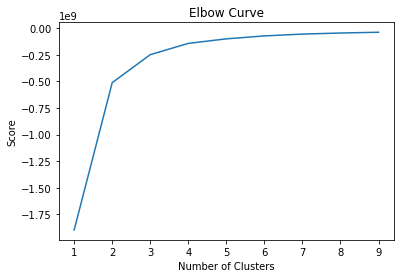

In [38]:
pl.plot(num_cl,score_b)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [40]:
score_p = [kmeans[i].fit(pitchers).score(pitchers) for i in range(len(kmeans))]
score_p

[-206484750.7382093,
 -67838688.58823463,
 -38139775.31597167,
 -26964036.344068103,
 -21433223.081952326,
 -17118961.363840524,
 -14046875.005502991,
 -11991365.639436554,
 -10483452.133738771]

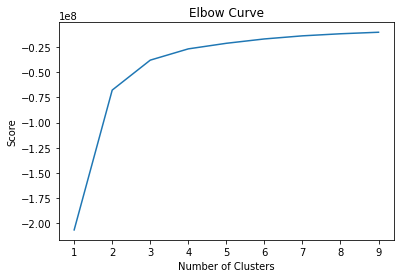

In [39]:
pl.plot(num_cl,score_p)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### we see from here that both our batters and pitchers are going to be using three clusters

## K-means cluster

In [43]:
kmeans_b = KMeans(n_clusters = 3) 

In [44]:
kmeans_p = KMeans(n_clusters = 3) 

In [45]:
kmeans.fit(batters)

KMeans(n_clusters=3)

In [46]:
kmeans.fit(pitchers)

KMeans(n_clusters=3)

In [47]:
batters['clusters'] = kmeans_b.fit_predict(batters)

In [48]:
pitchers['clusters'] = kmeans_p.fit_predict(pitchers)

In [49]:
batters.head()

,WAR,HR,ASG,H,seasonsPlayed,region_Latin Born,region_Other,region_US Born,clusters
0,105.72,570,16.0,2659,17,0,0,1,2
1,-2.77,13,0.0,216,7,0,0,1,0
2,-0.35,0,0.0,2,3,0,0,1,0
3,-1.44,18,0.0,157,5,0,0,1,0
4,0.54,62,0.0,523,10,0,0,1,1


In [50]:
pitchers.head()

,WAR,ERA_plus,G_all,seasonsPlayed,ASG,region_Latin Born,region_Other,region_US Born,clusters
0,1.85,94.744369,331,9,0.0,0,0,1,2
1,15.09,126.585193,448,13,1.0,0,0,1,0
2,3.18,116.022263,400,11,0.0,1,0,0,2
3,-0.40,63.615385,8,1,0.0,0,0,1,1
4,5.26,97.366300,248,12,0.0,0,0,1,2


In [51]:
batters['clusters'].value_counts()

0    3923
1    1078
2     428
Name: clusters, dtype: int64

In [52]:
pitchers['clusters'].value_counts()

1    4372
2    1393
0     492
Name: clusters, dtype: int64

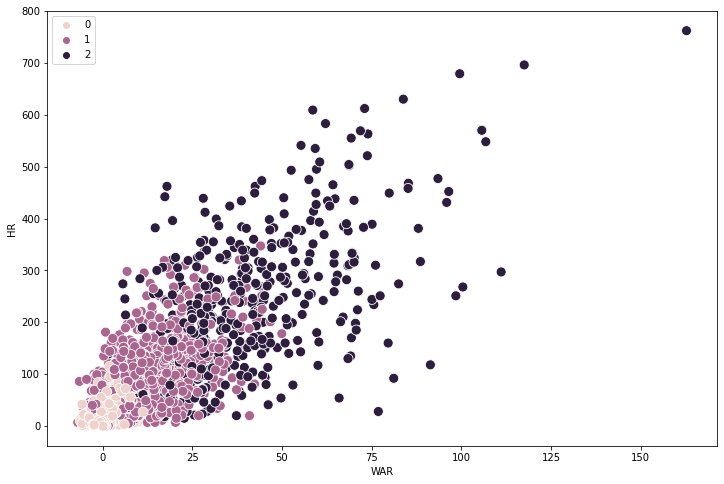

In [54]:
# Plot the clusters for the "WAR" and "HR" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=batters['WAR'], y=batters['HR'], hue=kmeans_b.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('WAR') # Label x-axis.
plt.ylabel('HR') # Label y-axis.
plt.show()

### the more HR a player hits, the more their teams scores. The more their teams scores, the more their team wins. Here it shows a positive realtionship between WAR and ERA_plus which therefore makes sesne as the more HR's a player hits the more "wins" he is worth

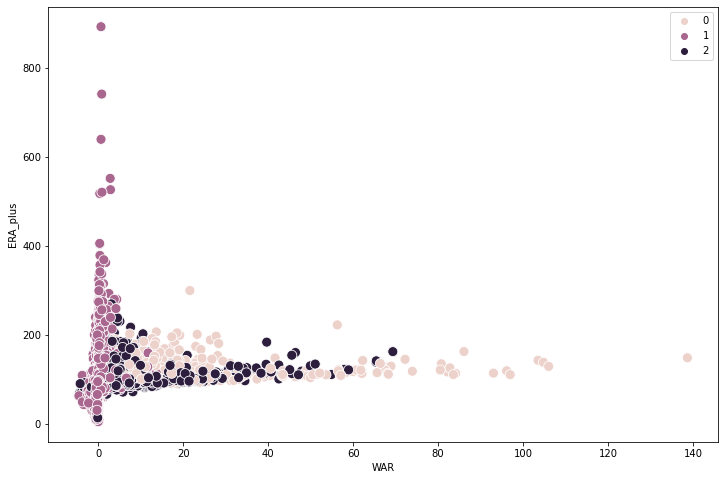

In [56]:
# Plot the clusters for the "WAR" and "ERA_plus" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=pitchers['WAR'], y=pitchers['ERA_plus'], hue=kmeans_p.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('WAR') # Label x-axis.
plt.ylabel('ERA_plus') # Label y-axis.
plt.show()

### even though ERA plus is amont the more modern stats, (its a measure of a pitchers earned run average with ballpark dimension factors and opponents), it seemingly does not match up with a pitchers WAR value to a team. True is measures runs given up in a more accurate and fair way... but what about defense? What if a pitchers defense behind him sucks but he himself doesn't suck? Or vice versa. That's just a thought as to why!


In [57]:
batters.loc[batters['clusters'] == 2, 'cluster'] = 'dark purple'
batters.loc[batters['clusters'] == 1, 'cluster'] = 'purple'
batters.loc[batters['clusters'] == 0, 'cluster'] = 'pink'

In [58]:
pitchers.loc[pitchers['clusters'] == 2, 'cluster'] = 'dark purple'
pitchers.loc[pitchers['clusters'] == 1, 'cluster'] = 'purple'
pitchers.loc[pitchers['clusters'] == 0, 'cluster'] = 'pink'

In [59]:
batters.groupby('cluster').agg({'WAR':['mean', 'median'], 
                         'H':['mean', 'median'], 
                         'HR':['mean', 'median'],
                          'seasonsPlayed':['mean', 'median']})

WAR                    H                  HR         \
                  mean  median         mean  median        mean median   
cluster                                                                  
dark purple  40.477266  36.755  1967.563084  1866.0  237.154206  225.5   
pink          0.337130  -0.080   110.494774    50.0   10.267907    3.0   
purple       11.807393  10.355   875.192022   827.0   90.634508   82.0   

            seasonsPlayed         
                     mean median  
cluster                           
dark purple     17.002336   17.0  
pink             4.198063    3.0  
purple          11.846011   12.0

We see here that hits and HR's are what really drives a players WAR up, and HR's a lot more. If you see the difference between HR's between purple and dark purple, thats what sepereates a nice career from a great or legendary career! 

In [60]:
pitchers.groupby('cluster').agg({'WAR':['mean', 'median'], 
                         'ERA_plus':['mean', 'median'], 
                         'G_all':['mean', 'median'],
                          'seasonsPlayed':['mean', 'median']})

WAR            ERA_plus                   G_all         \
                  mean  median        mean      median        mean median   
cluster                                                                     
dark purple   7.979074   4.630  105.706720  101.763072  271.444365  258.0   
pink         18.460346  11.455  122.293506  117.770979  603.219512  563.0   
purple        0.310142  -0.030   90.821969   85.790645   46.967521   32.0   

            seasonsPlayed         
                     mean median  
cluster                           
dark purple      9.506102    9.0  
pink            15.449187   15.0  
purple           2.835087    2.0

the ERA plus between the worst (purple) and the best (pink ) aren't that far apart  ERA plus might not be the best stat to show success of a pitchers